In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import scikit_posthocs as sp
from preprocess import preprocess_data #전처리 함수
# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# 서부권역 파일 불러오기
trav_mas_seoul = pd.read_csv("../../data/seoul/trav_mas_Seoul.csv")
trav_mas_east= pd.read_csv("../../data/east/trav_mas_East.csv")
trav_mas_west= pd.read_csv("../../data/west/trav_mas_West.csv")
trav_mas_jeju= pd.read_csv("../../data/jeju/trav_mas_Jeju.csv")

va_info_seoul = pd.read_csv("../../data/seoul/va_info_Seoul.csv")
va_info_east = pd.read_csv("../../data/east/va_info_East.csv")
va_info_west = pd.read_csv("../../data/west/va_info_West.csv")
va_info_jeju = pd.read_csv("../../data/jeju/va_info_Jeju.csv")

trav_mas = pd.concat([trav_mas_east,trav_mas_jeju,trav_mas_seoul,trav_mas_west],axis=0, ignore_index=True)
va_info = pd.concat([va_info_east,va_info_jeju,va_info_seoul,va_info_west],axis=0, ignore_index=True)




C:\Users\User\AppData\Local\Temp\ipykernel_6916\211958496.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_east = pd.read_csv("../../data/east/va_info_East.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_6916\211958496.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_west = pd.read_csv("../../data/west/va_info_West.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_6916\211958496.py:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_jeju = pd.read_csv("../../data/jeju/va_info_Jeju.csv")


In [3]:
va_info = va_info[['여행ID','진행순서','방문지명','POI명','방문지역유형코드','방문선택이유코드']]
va_info = va_info.sort_values(by= ['여행ID','진행순서']).reset_index(drop=True)
va_info['여행ID'].value_counts()

d_d002701    77
d_d004817    77
d_d002283    73
d_d004100    67
d_d006312    63
             ..
c_c010873     1
a_a006559     1
c_c002746     1
c_c003218     1
c_c005665     1
Name: 여행ID, Length: 16000, dtype: int64

In [4]:
# 주관이 담긴 분류표 
df_theme=pd.read_csv('../../data/matrix/final_matrix.csv',index_col=0)
df_theme.index.name = '여행동기'
df_theme.loc['새로운 경험 추구', '기타'] = 1
df_theme

,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
여행동기,,,,,,,,,,,,,,,,
"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
여행 동반자와의 친밀감 및 유대감 증진,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
새로운 경험 추구,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0
"역사 탐방, 문화적 경험 등 교육적 동기",0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0
"운동, 건강 증진 및 충전",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1
SNS 사진 등록 등 과시,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0
"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0


In [24]:
trav_mas_df=trav_mas.sort_values(['여행ID']).reset_index(drop=True)
trav_mas_df=trav_mas_df[['여행ID','여행동기1','여행동행_유형','연령대']]
trav_mas_df['여행ID']=trav_mas_df['여행ID'].str[0] + '_' + trav_mas_df['여행ID']
trav_mas_df = trav_mas_df[trav_mas_df["여행동기1"] != "기타"]

In [25]:
# 만약 df_theme의 index가 여행동기라면 index → 열로 이동
df_theme = df_theme.reset_index()  # or df_theme.rename_axis('여행동기_1').reset_index()
df_theme
# 병합
merged = pd.merge(trav_mas_df, df_theme, how='left', left_on='여행동기1', right_on='여행동기')
merged = merged.drop(columns=['여행동기'])
merged[merged.isnull().any(axis=1)].head()

,여행ID,여행동기1,여행동행_유형,연령대,index,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,...,"산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
10851,c_c012262,NaN,3인 이상 여행(가족 외),20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merged = merged.rename(columns = {'테마시설(놀이공원, 와따파크)':'테마시설(놀이공원, 워터파크)'})

In [27]:
col_rename_map = {
    '문화시설(공연장, 영화관, 전시관)': '문화 시설(공연장, 영화관, 전시관 등)',
    '산책로, 둘레길': '산책로, 둘레길 등',
    '상업지구 & 상점': '상업지구(거리, 시장, 쇼핑시설)',
    '식당/ 카페': '식당/카페',
    '역사/유적/종교시설': '역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)',
    '친구집': '친구/친지집',
    '지역 축제/ 행사':'지역 축제/행사'
}
merged= merged.rename(columns=col_rename_map)
merged

,여행ID,여행동기1,여행동행_유형,연령대,index,숙소,자연관광지,"상업지구(거리, 시장, 쇼핑시설)","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",친구/친지집,...,"산책로, 둘레길 등",체험 활동 관광지,"문화 시설(공연장, 영화관, 전시관 등)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/행사,사무실,식당/카페,"역, 터미널, 고속도로 휴게소",집
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,4.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,a_a000016,새로운 경험 추구,나홀로 여행,30,3.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14189,d_d012488,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14190,d_d012489,"운동, 건강 증진 및 충전",나홀로 여행,30,5.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
14191,d_d012490,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,20,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
14192,d_d012491,새로운 경험 추구,2인 가족 여행,30,3.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [28]:
va_info_sum = pd.pivot_table(va_info,
    index='여행ID',
    columns='방문지역유형코드',
    aggfunc='size',
    fill_value=0)
va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)
va_info_sum[va_info_sum['집']==0]

방문지역유형코드,기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)","문화 시설(공연장, 영화관, 전시관 등)",사무실,"산책로, 둘레길 등","상업지구(거리, 시장, 쇼핑시설)",상점,숙소,식당/카페,"역, 터미널, 고속도로 휴게소","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",자연관광지,지역 축제/행사,집,체험 활동 관광지,친구/친지집,"테마시설(놀이공원, 워터파크)"
여행ID,,,,,,,,,,,,,,,,,
a_a000108,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0
a_a000142,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1
a_a000181,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0
a_a000182,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0
a_a000186,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_d012349,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0
d_d012354,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
d_d012405,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1


In [29]:
va_info['방문여부']=1
visit_matrix = va_info.pivot_table(index='여행ID',columns = '방문지역유형코드',values='방문여부',aggfunc='max',fill_value=0).reset_index()
visit_matrix.columns.name = None
visit_matrix['상업지구(거리, 시장, 쇼핑시설)'] = visit_matrix[['상업지구(거리, 시장, 쇼핑시설)', '상점']].max(axis=1)

# 2. 원래 컬럼 제거
visit_matrix = visit_matrix.drop(columns=['상점'], errors='ignore')

In [30]:
# 1. 비교할 지역유형 컬럼 추출
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

# 2. visit_matrix: 실제 방문 기록
real_df = visit_matrix.set_index('여행ID')[compare_cols].copy()

# 3. merged: 주관적 예측 데이터
# 여행동기 컬럼 제외하고 비교 대상만 추출
pred_df = merged.set_index('여행ID')[compare_cols].copy()

# 4. 공통 인덱스 및 컬럼으로 정렬 및 정제
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df_aligned = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df_aligned = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 5. 불일치 개수 및 비율 계산
mismatch = (real_df_aligned != pred_df_aligned).sum(axis=1)
total_cols = len(common_cols)

result = pd.DataFrame({
    '여행ID': real_df_aligned.index,
    '불일치율': mismatch / total_cols
}).reset_index(drop=True)

# 6. 여행동기 정보 붙이기
result = result.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')

# 결과 확인
result


,여행ID,불일치율,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
2,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
3,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
14189,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
14190,d_d012489,0.4375,"운동, 건강 증진 및 충전"
14191,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
14192,d_d012491,0.6250,새로운 경험 추구


In [31]:
# 방문순서 오름차순 정렬
va_info_sorted = va_info.sort_values(['여행ID', '진행순서'])

# 각 여행ID별 첫/마지막 행의 인덱스
first_idx = va_info_sorted.groupby('여행ID').head(1).index
last_idx = va_info_sorted.groupby('여행ID').tail(1).index

# 첫/마지막 인덱스 중에서 '집' 또는 '친구/친지집'인 것만 추출
to_remove_idx = va_info_sorted.loc[
    first_idx.union(last_idx),
    :
].query("방문지역유형코드 in ['집', '친구/친지집']").index

# 해당 행만 제거
va_info_cleaned = va_info_sorted.drop(index=to_remove_idx).copy()
# 비교 대상 컬럼 (여행ID 제외)
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

real_df = visit_matrix.set_index('여행ID')[compare_cols]
pred_df = merged.set_index('여행ID')[compare_cols]

# 공통 여행ID, 컬럼 정렬
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 불일치율 계산
mismatch = (real_df != pred_df).sum(axis=1)
result_refined = pd.DataFrame({
    '여행ID': real_df.index,
    '불일치율_filltered': mismatch / len(common_cols)
}).reset_index(drop=True)

# 여행동기 추가
result_refined = result_refined.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')
result_refined

,여행ID,불일치율_filltered,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000011,0.6250,여행 동반자와의 친밀감 및 유대감 증진
2,a_a000012,0.3750,"역사 탐방, 문화적 경험 등 교육적 동기"
3,a_a000013,0.5625,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000016,0.5625,새로운 경험 추구
...,...,...,...
14189,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
14190,d_d012489,0.4375,"운동, 건강 증진 및 충전"
14191,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
14192,d_d012491,0.6250,새로운 경험 추구


In [32]:
result.describe()

,불일치율
count,14194.000000
mean,0.467425
std,0.141425
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,1.000000


In [33]:
result_refined.describe()

,불일치율_filltered
count,14194.000000
mean,0.467425
std,0.141425
min,0.062500
25%,0.375000
50%,0.500000
75%,0.562500
max,1.000000


In [34]:
diff = (result['불일치율'] - result_refined['불일치율_filltered']).abs()
print("변화가 있는 여행ID 수:", (diff > 1e-6).sum())
'''
“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.
이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.
따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”
'''

변화가 있는 여행ID 수: 0


'\n“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.\n이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.\n따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”\n'

In [35]:
trav_mas_df['불일치율'] = result['불일치율']
trav_mas_df.dropna(inplace=True)
trav_mas_df.to_csv("../../data/global/불일치율_분석결과.csv", index=False, encoding='utf-8-sig')

In [36]:
trav_mas_df = pd.read_csv('../../data/global/불일치율_분석결과.csv')
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대,불일치율
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,0.5000
1,a_a000011,여행 동반자와의 친밀감 및 유대감 증진,3대 동반 여행(친척 포함),20,0.6250
2,a_a000012,"역사 탐방, 문화적 경험 등 교육적 동기",나홀로 여행,30,0.3750
3,a_a000013,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),30,0.5625
4,a_a000016,새로운 경험 추구,나홀로 여행,30,0.3750
...,...,...,...,...,...
13982,d_d010533,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,0.6250
13983,d_d010534,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",2인 여행(가족 외),20,0.4375
13984,d_d010548,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,30,0.6250
13985,d_d010551,"운동, 건강 증진 및 충전",부모 동반 여행,30,0.6250


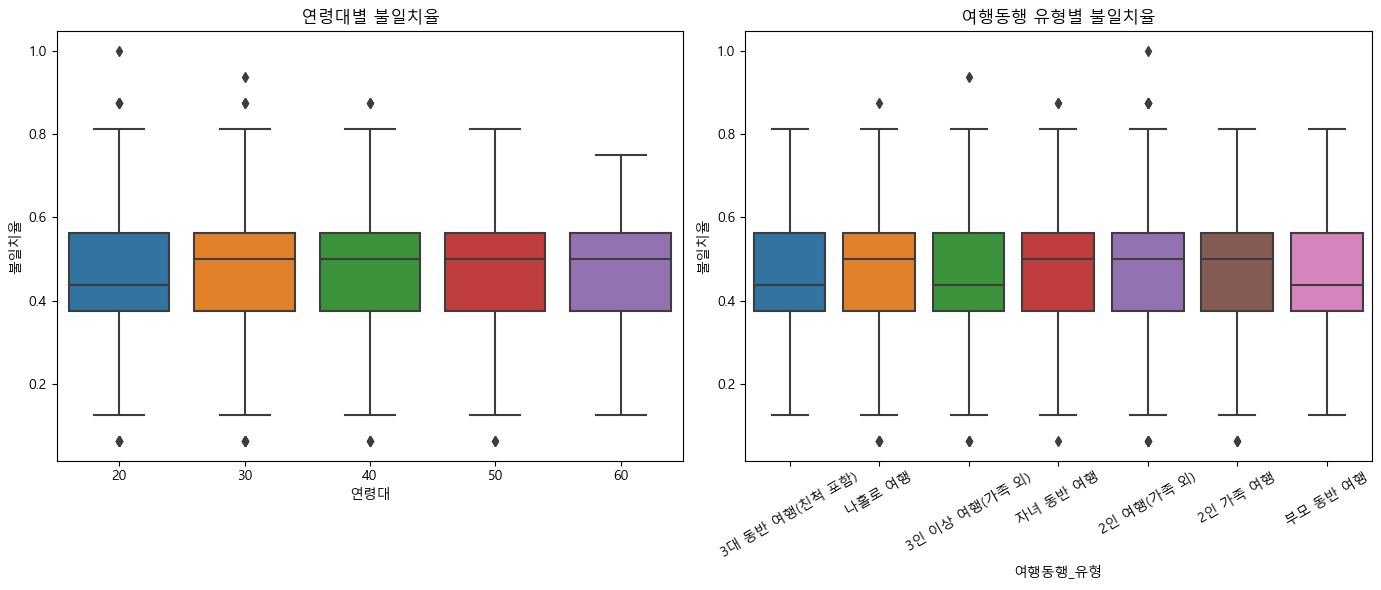

In [37]:
# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import pandas as pd
from scipy import stats

# 결과 저장용
results = []

# 연령대별 정규성 검정 (Anderson–Darling, 정규분포 가정)
for name, group in trav_mas_df.groupby('연령대', dropna=False):
    x = group['불일치율'].dropna().values
    n = x.size

    if n < 3:  # 표본 너무 작으면 판정 보류
        results.append((name, n, np.nan, np.nan, '샘플부족'))
        continue

    ad = stats.anderson(x, dist='norm')
    ad_stat = ad.statistic
    crit = ad.critical_values          # [15%, 10%, 5%, 2.5%, 1%]
    sigs = ad.significance_level       # [15., 10., 5., 2.5, 1.]

    # 5% 기준(인덱스 2)으로 판정
    crit_5 = crit[2]
    decision = '정규성 만족' if ad_stat <= crit_5 else '위반'

    results.append((name, n, ad_stat, crit_5, decision))

# 결과 보기
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'AD 통계량', 'AD 임계(5%)', '정규성 여부'])
result_df = result_df.sort_values(by='연령대')
result_df

,연령대,샘플 수,AD 통계량,AD 임계(5%),정규성 여부
0,20,5109,47.026785,0.786,위반
1,30,5175,47.779529,0.786,위반
2,40,2380,22.410820,0.786,위반
3,50,922,9.282821,0.784,위반
4,60,401,5.120190,0.779,위반


In [43]:
import numpy as np
import pandas as pd
from scipy import stats

# 결과 저장용
results = []

# 연령대별 정규성 검정 (Anderson–Darling, 정규분포 가정)
for name, group in trav_mas_df.groupby('여행동행_유형', dropna=False):
    x = group['불일치율'].dropna().values
    n = x.size

    if n < 3:  # 표본 너무 작으면 판정 보류
        results.append((name, n, np.nan, np.nan, '샘플부족'))
        continue

    ad = stats.anderson(x, dist='norm')
    ad_stat = ad.statistic
    crit = ad.critical_values          # [15%, 10%, 5%, 2.5%, 1%]
    sigs = ad.significance_level       # [15., 10., 5., 2.5, 1.]

    # 5% 기준(인덱스 2)으로 판정
    crit_5 = crit[2]
    decision = '정규성 만족' if ad_stat <= crit_5 else '위반'

    results.append((name, n, ad_stat, crit_5, decision))

# 결과 보기
result_df = pd.DataFrame(results, columns=['여행동행_유형', '샘플 수', 'AD 통계량', 'AD 임계(5%)', '정규성 여부'])
result_df = result_df.sort_values(by='여행동행_유형')
result_df

,여행동행_유형,샘플 수,AD 통계량,AD 임계(5%),정규성 여부
0,2인 가족 여행,1212,11.150305,0.784,위반
1,2인 여행(가족 외),3934,37.315462,0.786,위반
2,3대 동반 여행(친척 포함),328,3.518032,0.778,위반
3,3인 이상 여행(가족 외),1818,16.631822,0.785,위반
4,나홀로 여행,4165,38.949843,0.786,위반
5,부모 동반 여행,602,5.906204,0.782,위반
6,자녀 동반 여행,1928,20.093518,0.785,위반


In [52]:
# 귀무가설(H0): 연령대 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (연령대별 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

연령대별 Kruskal-Wallis 결과: H=12.402, p=0.015


In [45]:
#  귀무가설(H0): 여행동행_유형 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (여행동행_유형 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"여행동행_유형 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


여행동행_유형 Kruskal-Wallis 결과: H=9.806, p=0.133


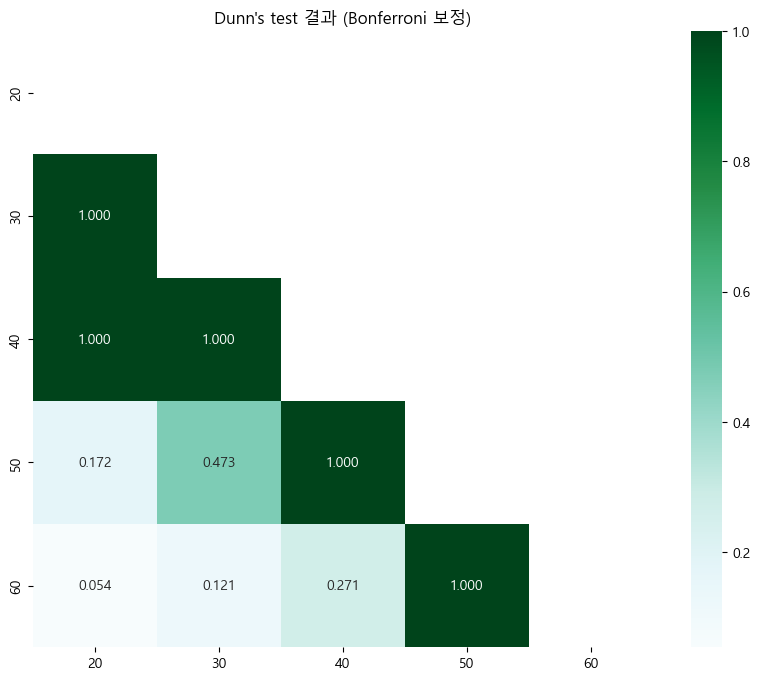

In [50]:
# 사후 검정 (보수적인 분석방법)
import scikit_posthocs as sp
import pandas as pd

# Dunn’s test (Bonferroni 보정 포함)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='연령대', p_adjust='bonferroni')
mask = np.triu(np.ones_like(dunn_result, dtype=bool))
# 결과 확인
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask ,annot=True, cmap='BuGn', fmt=".3f")
plt.title("Dunn's test 결과 (Bonferroni 보정)")
plt.show()

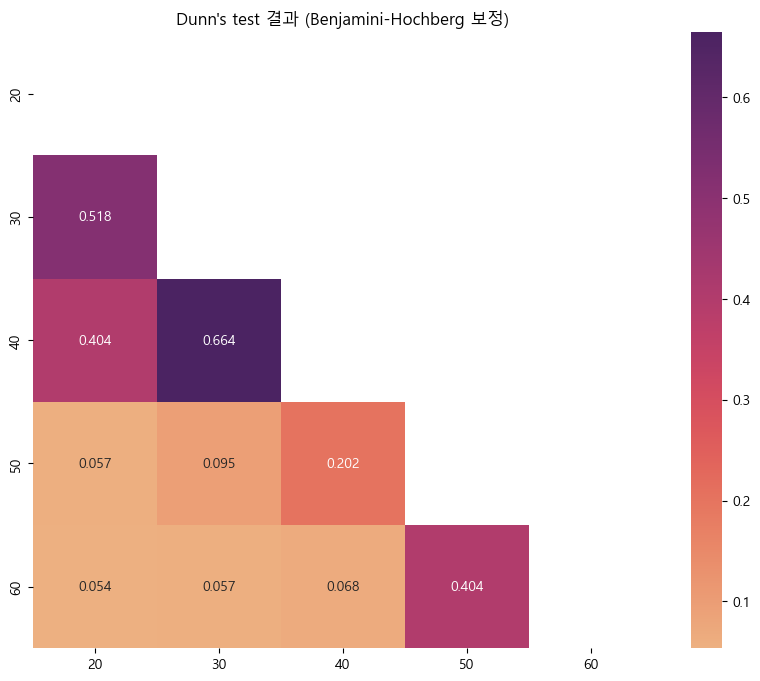

In [51]:
# Dunn’s test (탐색적 분석)
dunn_result = sp.posthoc_dunn(trav_mas_df, val_col='불일치율', group_col='연령대', p_adjust='fdr_bh')

plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result,mask=mask, annot=True, cmap='flare', fmt=".3f")
plt.title("Dunn's test 결과 (Benjamini-Hochberg 보정)")
plt.show()

In [53]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import scikit_posthocs as sp

df = trav_mas_df[['연령대','불일치율']].dropna().copy()

# 0과 1이 있으면 logit이 터지니 살짝 clip
eps = 1e-6
df['mis_logit'] = np.log((df['불일치율'].clip(eps, 1-eps)) / (1 - df['불일치율'].clip(eps, 1-eps)))

# --- Welch ANOVA (OLS + HC3로 근사) ---
# 범주 더미화 후 OLS, 이분산 강건분산(‘HC3’)로 F 검정
X = pd.get_dummies(df['연령대'], drop_first=True)
X = sm.add_constant(X)
ols = sm.OLS(df['mis_logit'], X).fit(cov_type='HC3')
print(ols.summary())

# --- Games-Howell 사후 ---
gh = sp.posthoc_gameshowell(df, val_col='mis_logit', group_col='연령대')
print('\n[Games-Howell on logit(불일치율) — p-values]\n', gh)

# === Heatmap 시각화 ===
labels = gh.index.tolist()
p_mat = gh.values.astype(float)
np.fill_diagonal(p_mat, np.nan)

fig = plt.figure(figsize=(1.2*len(labels), 1.0*len(labels)))
ax = fig.add_subplot(111)
im = ax.imshow(p_mat, aspect='equal')  # 기본 컬러맵
ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
plt.colorbar(im, ax=ax, label='Games-Howell p-value')

alpha = 0.05
for i in range(len(labels)):
    for j in range(len(labels)):
        if np.isnan(p_mat[i,j]): 
            continue
        p = p_mat[i,j]
        star = '***' if p<0.001 else '**' if p<0.01 else '*' if p<alpha else ''
        ax.text(j, i, f"{p:.3f}{' '+star if star else ''}", ha='center', va='center', fontsize=9)

ax.set_title('연령대 쌍대비교: Games-Howell (logit 변환)')
plt.tight_layout(); plt.show()

# === 분포 박스플롯 ===
fig2 = plt.figure(figsize=(1.1*len(labels), 5))
ax2 = fig2.add_subplot(111)
order = df['연령대'].unique().tolist()   # 필요시 원하는 순서로 정렬
data_plot = [df.loc[df['연령대']==lab, '불일치율'].values for lab in order]
ax2.boxplot(data_plot, labels=order, showmeans=True)
ax2.set_ylabel('불일치율'); ax2.set_title('연령대별 불일치율 분포')
ax2.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()


                            OLS Regression Results                            
Dep. Variable:              mis_logit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.061
Date:                Mon, 11 Aug 2025   Prob (F-statistic):             0.0156
Time:                        20:41:22   Log-Likelihood:                -13363.
No. Observations:               13987   AIC:                         2.674e+04
Df Residuals:                   13982   BIC:                         2.677e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1542      0.009    -16.989      0.0

AttributeError: module 'scikit_posthocs' has no attribute 'posthoc_gameshowell'

Note: you may need to restart the kernel to use updated packages.
